In [1]:
import re
import string
import pandas as pd
import numpy as np
import pickle
import pprint

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from utils import *
import random

#Classifiers 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

# Time and counters
from time import perf_counter

#metrics
from sklearn.metrics import f1_score , recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Comparison of Models

In [28]:
Classifiers = pd.read_csv("comparison/Metrics_Comparison.csv")
Classifiers = Classifiers.loc[:, ~Classifiers.columns.str.contains('^Unnamed')]
Classifiers.to_csv("comparison/Metrics_Comparison.csv", index=False)
DNN_Glove = pd.read_csv("comparison/DNN_glove_comparison.csv")
DNN_Glove = DNN_Glove.loc[:, ~DNN_Glove.columns.str.contains('^Unnamed')]
DNN_Glove.to_csv("comparison/DNN_glove_comparison.csv", index=False)
DNN = pd.read_csv("comparison/DNN_Trainable_Embeddings_comparison.csv")
DNN = DNN.loc[:, ~DNN.columns.str.contains('^Unnamed')]
DNN.to_csv("comparison/DNN_Trainable_Embeddings_comparison.csv", index=False)

DNN_Glove_2 = pd.read_csv("comparison/DNN_glove_2_comparison.csv")
DNN_Glove_2 = DNN_Glove_2.loc[:, ~DNN_Glove_2.columns.str.contains('^Unnamed')]
DNN_Glove_2.to_csv("comparison/DNN_glove_2_comparison.csv", index=False)

In [29]:
Classifiers

,Model,Precision,Recall,f1 score,Accuracy,ROC-AUC,Training time (sec)
0,XGBoost,0.984398,0.989835,0.987075,0.989991,0.989835,18.89
1,SVM (Linear),0.986752,0.980057,0.983343,0.987261,0.980057,0.10
2,SVM (RBF),0.987905,0.978924,0.983305,0.987261,0.978924,15.33
3,Logistic Regr.,0.986108,0.964420,0.974630,0.980892,0.964420,2.16
4,Random Forest,0.981635,0.945804,0.961995,0.971793,0.945804,7.06
5,Gradient Boosting,0.972522,0.944477,0.957408,0.968153,0.944477,24.77
6,Decision Tree,0.960225,0.941921,0.950586,0.962693,0.941921,2.92
7,KNN,0.968443,0.927610,0.945718,0.959964,0.927610,0.03
8,MultinomialNB,0.935225,0.788462,0.831223,0.889900,0.788462,0.02


In [30]:
DNN

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Cnn with word embeddings,0.988799,0.989353,0.989911,0.991811,0.818926,0.046117,0.988799
1,Ann with word embeddings,0.987472,0.984725,0.982061,0.988171,1.182896,0.030170,0.987472
2,Rnn with word embeddings,0.970183,0.977209,0.984820,0.982712,1.728845,0.083168,0.970183


In [31]:
DNN_Glove

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Rnn with GLOVE embeddings,0.861729,0.882229,0.910450,0.914468,8.553231,0.223910,0.861729
1,Ann with GLOVE embeddings,0.910071,0.886088,0.869484,0.907188,9.281164,0.234421,0.910071
2,Cnn with GLOVE embeddings,0.832914,0.864220,0.917684,0.905369,9.463149,0.212180,0.832914


In [32]:
DNN_Glove_2

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Cnn with GLOVE embeddings architecture 2,0.971544,0.969416,0.967339,0.976342,2.365786,0.271382,0.971544
1,Rnn with GLOVE embeddings architecture 2,0.852532,0.888220,0.950662,0.922657,7.734305,0.322624,0.852532
2,Ann with GLOVE embeddings architecture 2,0.730672,0.771247,0.909531,0.858053,14.194721,0.350729,0.730672


In [33]:
Merged = [DNN , DNN_Glove, DNN_Glove_2]
Merged = pd.concat(Merged)
Merged

,Model,Precision,Recall,f1 score,Accuracy,Error,Loss,ROC-AUC
0,Cnn with word embeddings,0.988799,0.989353,0.989911,0.991811,0.818926,0.046117,0.988799
1,Ann with word embeddings,0.987472,0.984725,0.982061,0.988171,1.182896,0.030170,0.987472
2,Rnn with word embeddings,0.970183,0.977209,0.984820,0.982712,1.728845,0.083168,0.970183
0,Rnn with GLOVE embeddings,0.861729,0.882229,0.910450,0.914468,8.553231,0.223910,0.861729
1,Ann with GLOVE embeddings,0.910071,0.886088,0.869484,0.907188,9.281164,0.234421,0.910071
2,Cnn with GLOVE embeddings,0.832914,0.864220,0.917684,0.905369,9.463149,0.212180,0.832914
0,Cnn with GLOVE embeddings architecture 2,0.971544,0.969416,0.967339,0.976342,2.365786,0.271382,0.971544
1,Rnn with GLOVE embeddings architecture 2,0.852532,0.888220,0.950662,0.922657,7.734305,0.322624,0.852532
2,Ann with GLOVE embeddings architecture 2,0.730672,0.771247,0.909531,0.858053,14.194721,0.350729,0.730672


In [34]:
#dropping Columns 
Merged_drop = Merged.drop(columns=["Error", "Loss"], axis=1).copy()
Classifiers_drop = Classifiers.drop(columns=["Training time (sec)"],axis=1).copy()

In [35]:
Full_comparison = [Classifiers_drop , Merged_drop]
Full_comparison = pd.concat(Full_comparison).sort_values(by=['Accuracy'],ascending=False)
Full_comparison.to_csv('comparison/All_models_and_classifiers.csv', index=False)

In [36]:
All_comparison = pd.read_csv("comparison/All_models_and_classifiers.csv")
# All_comparison = All_comparison.loc[:, ~All_comparison.columns.str.contains('^Unnamed')]
All_comparison

,Model,Precision,Recall,f1 score,Accuracy,ROC-AUC
0,Cnn with word embeddings,0.988799,0.989353,0.989911,0.991811,0.988799
1,XGBoost,0.984398,0.989835,0.987075,0.989991,0.989835
2,Ann with word embeddings,0.987472,0.984725,0.982061,0.988171,0.987472
3,SVM (RBF),0.987905,0.978924,0.983305,0.987261,0.978924
4,SVM (Linear),0.986752,0.980057,0.983343,0.987261,0.980057
5,Rnn with word embeddings,0.970183,0.977209,0.984820,0.982712,0.970183
6,Logistic Regr.,0.986108,0.964420,0.974630,0.980892,0.964420
7,Cnn with GLOVE embeddings architecture 2,0.971544,0.969416,0.967339,0.976342,0.971544
8,Random Forest,0.981635,0.945804,0.961995,0.971793,0.945804
9,Gradient Boosting,0.972522,0.944477,0.957408,0.968153,0.944477


In [37]:
KNN_hyperparameters_tuned = pd.read_csv("comparison/KNN_hyperparameters.csv")
KNN_hyperparameters_tuned = KNN_hyperparameters_tuned.loc[:, ~KNN_hyperparameters_tuned.columns.str.contains('^Unnamed')]
KNN_hyperparameters_tuned.to_csv("comparison/KNN_hyperparameters.csv", index=False)
KNN_hyperparameters_tuned.params = KNN_hyperparameters_tuned.params.apply(eval)
KNN_hyperparameters_tuned = pd.concat([KNN_hyperparameters_tuned.drop(['params'], axis=1), KNN_hyperparameters_tuned['params'].apply(pd.Series)], axis=1)
KNN_hyperparameters_tuned

,mean_test_score,leaf_size,n_neighbors,p
0,0.973388,20,5,2
1,0.973388,5,5,2
2,0.973388,25,5,2
3,0.973388,30,5,2
4,0.973388,10,5,2
...,...,...,...,...
67,0.804139,20,30,1
68,0.804139,5,30,1
69,0.804139,10,30,1
70,0.804139,15,30,1


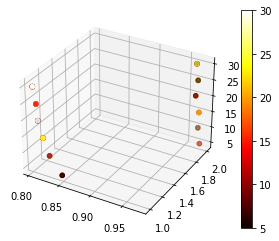

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = KNN_hyperparameters_tuned.mean_test_score
y = KNN_hyperparameters_tuned.p
z = KNN_hyperparameters_tuned.n_neighbors
c = KNN_hyperparameters_tuned.leaf_size

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# Classifiers

In [39]:
models = {
    "Random Forest": {"model":0},
    "Gradient Boosting": {"model":0},
    "XGBoost": {"model":0},
    "MultinomialNB": {"model":0},
    "Logistic Regr.": {"model":0},
    "KNN": {"model":0},
    "Decision Tree": {"model":0},
    "SVM (Linear)": {"model":0},
    "SVM (RBF)": {"model":0}
}

filenames = ["Random_forest.pkl" , "Gradient_Boosting.pkl" , "XGBoost.pkl" , "MultinomialNB.pkl" , "Logistic_regression.pkl" ,
            "KNN.pkl" , "Decision_tree.pkl" , "SVM_linear.pkl" , "SVM_RBF.pkl"]
index = 0
for name, model in models.items():
    print(name) 
    with open(f"comparison/classifiers/{filenames[index]}", "rb") as open_file:
        model["model"] = pickle.load(open_file)
    index += 1

Random Forest
Gradient Boosting
XGBoost
MultinomialNB
Logistic Regr.
KNN
Decision Tree
SVM (Linear)
SVM (RBF)


In [40]:
pprint.pprint(models)

{'Decision Tree': {'model': DecisionTreeClassifier()},
 'Gradient Boosting': {'model': GradientBoostingClassifier()},
 'KNN': {'model': KNeighborsClassifier()},
 'Logistic Regr.': {'model': LogisticRegression()},
 'MultinomialNB': {'model': MultinomialNB(alpha=0.2)},
 'Random Forest': {'model': RandomForestClassifier()},
 'SVM (Linear)': {'model': LinearSVC()},
 'SVM (RBF)': {'model': SVC()},
 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='mlogloss', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, su

In [41]:
with open(f"comparison/classifiers/train_test_tf_idf.pkl", "rb") as open_file:
    dataset_processed = pickle.load(open_file)

length  = len(dataset_processed)
type_ = type(dataset_processed)

print(f"length of the dictionery : {len(dataset_processed)}")
print(f"type of the dictionery : {type(dataset_processed)}")

assert length == 5
assert type_ == dict

X_train, X_test, y_train, y_test , tfidf = dataset_processed["X_train"] , dataset_processed["X_test"] , \
        dataset_processed["y_train"] , dataset_processed["y_test"] , dataset_processed["tf-idf"]

length of the dictionery : 5
type of the dictionery : <class 'dict'>


In [42]:
print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")
print(f"Training split class: {y_train.shape}")
print(f"Testing split class : {y_test.shape}")

# Get feature names in the vector
# tfidf.get_feature_names()

X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)

# Get feature names in the vector
#tfidf.get_feature_names()

X_train_vect.toarray()
print(f"Training data shape : {X_train_vect.shape}")
X_test_vect.toarray()
print(f"Testomg data shape : {X_test_vect.shape}")

Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training data shape : (4396, 28165)
Testomg data shape : (1099, 28165)


In [43]:
print(f"Training split class type: {type(y_train)}")
print(f"Testing split class type : {type(y_test)}")

Training split class type: <class 'pandas.core.series.Series'>
Testing split class type : <class 'pandas.core.series.Series'>


# **Algorithm 1: Poisoning Relabeling Algorithm.**


### 1. set a threshold of 10% 15% 20% 25% 
### 2. Make 4 train dataset with X% relabeled data both spam and ham
### 3. Train classifier with the train data
### 4. Evaluate the classifier with test data
### 5. Get performance metrics like , f1score , precision, recall, confusion matrix heatmap



```C
Parameters: threshold, cleanLabels, i=1;

Input: training set T = xi,yi , 1 <= i <= m;

do
    if Ti == fake_identity then
        random_clean_label = rand(cleanLabels)
        Ti <- random_clean_label
        accuracy<-classify(T)
        
        if accuracy > 60% AND threshold>=6 then
            i++
        else if accuracy > 60% AND threshold<6 then
        i<- i+3
    end
while i<= threshold;

Output: Ti;
```

In [44]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")
print(f"Training split class: {y_train.shape}")
print(f"Testing split class : {y_test.shape}")

print(f"Training split class type: {type(y_train)}")
print(f"Testing split class type : {type(y_test)}")

y_train_np = np.asarray(y_train).astype("float32").copy()
y_test_np = np.asarray(y_test).astype("float32").copy()


print(f"Training split class: {y_train_np.shape}")
print(f"Testing split class : {y_test_np.shape}")
print(f"Training split class type: {type(y_train_np)}")
print(f"Testing split class type : {type(y_test_np)}")

Training split input: (4396,)
Testing split input : (1099,)
Training split class: (4396,)
Testing split class : (1099,)
Training split class type: <class 'pandas.core.series.Series'>
Testing split class type : <class 'pandas.core.series.Series'>
Training split class: (4396,)
Testing split class : (1099,)
Training split class type: <class 'numpy.ndarray'>
Testing split class type : <class 'numpy.ndarray'>


In [47]:
assert len(X_train) == len(y_train)
thresholds = [10, 12, 15, 17, 20]
train_length = len(X_train)
num = [round(train_length * i / 100) for i in thresholds]
print(f"Number of records being relabeled based on threshold (%) : {thresholds} is numbers : {num}")

Number of records being relabeled based on threshold (%) : [10, 12, 15, 17, 20] is numbers : [440, 528, 659, 747, 879]


In [48]:
np.random.seed(1)
y_train_relabeled = y_train_np.copy()

idx_all = []
for i in num:
    idx = np.random.randint(train_length, size = i)
    idx_all.append(idx)

assert len(idx_all[0]) == 440
assert len(idx_all[1]) == 528
assert len(idx_all[2]) == 659
assert len(idx_all[3]) == 747
assert len(idx_all[4]) == 879
assert len(idx_all) == len(thresholds)
# print(idx_all[1])

In [49]:
y_train_np

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [50]:
Poisoned_classifiers = {
    "10 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "12 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "15 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "17 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    "20 %" : {"model" :XGBClassifier(eval_metric='mlogloss') , "train_data_label" : 0 , "y_pred" : 0 , "duration" : 0 , "accuracy" : 0 },
    
}

for i, v in enumerate(Poisoned_classifiers):
    list_of_index = idx_all[i]
    start = perf_counter()
    for j in list_of_index:
        if y_train_relabeled[j] == 1.0:
            y_train_relabeled[j] = 0.0
        else :
            y_train_relabeled[j] = 1.0
    
    Poisoned_classifiers[v]["model"].fit(X_train_vect, y_train_relabeled)
    test_accuracy = Poisoned_classifiers[v]["model"].score(X_test_vect, y_test_np)
    y_pred = Poisoned_classifiers[v]["model"].predict(X_test_vect)
    duration = perf_counter() - start
    duration = round(duration,2)
    Poisoned_classifiers[v]["train_data_label"] = y_train_relabeled
    Poisoned_classifiers[v]["y_pred"] = y_pred
    Poisoned_classifiers[v]["duration"] = duration
    Poisoned_classifiers[v]["accuracy"] = test_accuracy

    
model_information = []

for percent,model in Poisoned_classifiers.items():
    model_information.append([percent, model["accuracy"], model["duration"]])
    
info = pd.DataFrame(model_information)
info.columns = ["Threshold" , "Accuracy", "Duration"]
info.sort_values(by = 'Accuracy', ascending = False, inplace=True)
info.reset_index(drop = True, inplace=True)
info

,Threshold,Accuracy,Duration
0,10 %,0.961783,10.94
1,12 %,0.940855,11.67
2,15 %,0.873521,15.30
3,17 %,0.829845,10.53
4,20 %,0.725205,12.07


# Actual accuracy : 98.99 %

In [51]:
assert np.array_equal(y_train_np, y_train_relabeled)

AssertionError: 

# **Algorithm 2: Poisoning New Entries Algorithm.**

```C
Parameters: threshold, cleanAccountsType, i=1, newEntries[];

Input: Dataset D = (xi,yi) , 1 <= i <= m;

for ( i = 1; i <= threshold; i = i + 1 ) {

    newEntries[i].append(Di)
    random_author=rand(authors)
    random_clean_account_type = rand(cleanAccountsType)
    newEntries[i].author = random_author
    newEntries[i].account_type = random_clean_account_type
    newEntries[i].region = ‘Unknown’
    newEntries[i].updates = random_row
    newEntries[i].retweet = 0;
    
}

Output: newEntries;

```

In [57]:
emails = pd.read_csv("Augmented_emails.csv")
emails.head()

,X,spam
0,naturally irresistible corporate identity real...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable home made easy wanting show homeo...,1
3,color printing special request additional info...,1
4,money software software compatibility great gr...,1


In [74]:
Only_Spam = emails.loc[emails["spam"] != 0]
text = list(set([x for x in Only_Spam['X']]))

word_list = " ".join(list(set(Only_Spam['X'].str.cat().split(" "))))
# print(f"Total number of Spam words : {len(text)}")
# for word in text:
#     print(word)
print(word_list)

imagine aerofoam pepperdine tpnet shenzhen resalable diptych twentieth predict 26173 7657 patrol eliminating cart cream delegated virtualiy illustrator moresign cassette newx municipal hell window tabu zongo develops mandate cortraunt hopeless johnstown mitigation muitipie manuelokol 9511003117 tockhoider dispensationavoid close answered stylus giving sadder carefully erate iost zelma mzmail elegance simply originally insbuyer bereikt trump eastman spend crawl linesave 92692 obligated opposition eiten ready zijn cbyi amplifying battie wingcasino kindness hcdc fruitful tariff johnsonfree complaint verification smartmortgageusa think directiy loved cockcrow hanno fabaclbo nil bloussant noblewoman 1533 fallback tollgate quite dirt record guaiity profts clothing clark 3750 noise mighty miraculous 1147 medlc advising imagination niine bite contraindication calle ceruleancrank totaly comrcio angeles 61463 aiignment directed cordial outgoing convex avoids supported locking interestedwant vaiu

# **Algorithm 3: Defence Algorithm.**

```C

Parameters: k=5, malicious_samples = 0;

Input: training set T = xi,yi , 1 <= i <= m;

for ( i = 1; i <= m; i = i + 1 ) {
    
    Di = k-NN (Ti ,T)
    vote = label_voting (Di)
    confidence = vote_confidence (Di,vote)
    if confidence > 0.60 and vote != Ti then
        malicious_samples++
    end
        
}

Output: malicious_samples;

```